Load all packages you need.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Read the data.

In [11]:
# Load the data
file_path = '../data/diabetes.csv'
df = pd.read_csv(file_path, sep=",")

# Display the first few rows
df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

Bin the variable "Age" into useful intervals. Inspect the bins.

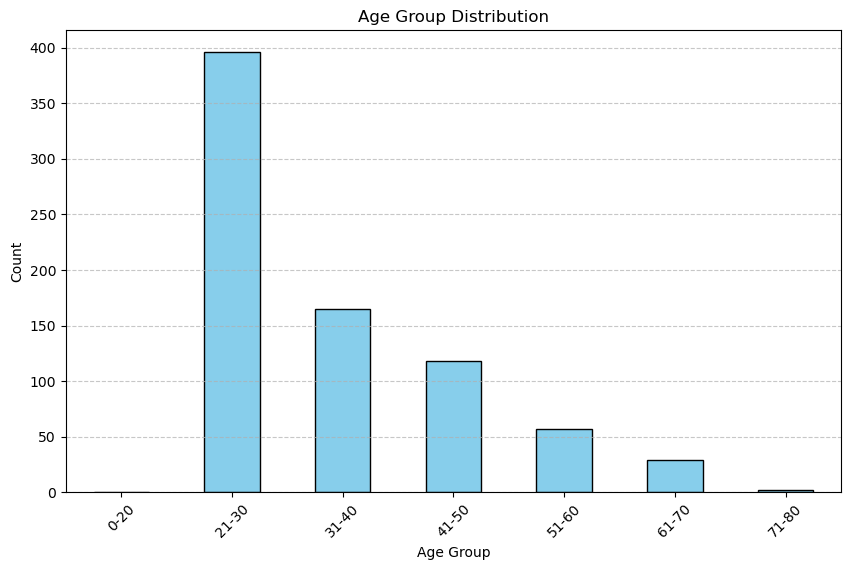

In [7]:
# Define the bins and labels
bins = [0, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Create a new column 'AgeGroup' with the binned data
# right=False means [x,y)
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Inspect the bins
df['AgeGroup'].value_counts()

# Get the value counts for each age group
age_group_counts = df['AgeGroup'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='k')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*Overall Interpretation:*
- The dataset is heavily skewed towards younger individuals, particularly those in the 21-30 age group.
- There is a noticeable decline in the number of individuals as age increases, with very few individuals in the older age groups (61-70 and 71-80).
- The absence of individuals in the 0-20 age group suggests that the dataset may not include data for children and teenagers.

The distribution of the serum "Insulin" seems to be skewed. <br> Create a histogram of the Insulin levels. Perform a log-transformation on the "Insulin" variable and recreate the histogram. What do you notice?

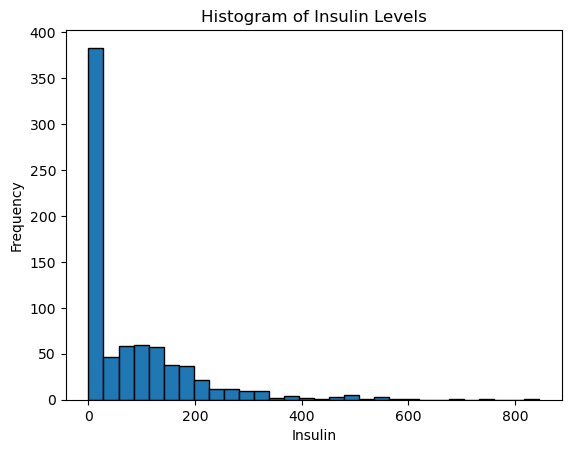

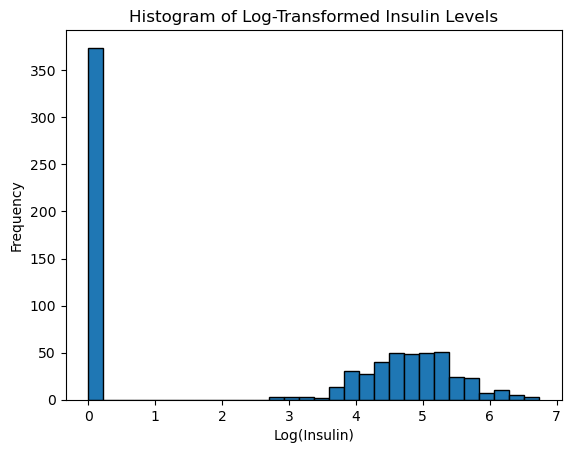

In [15]:
# Create a histogram of the Insulin levels
plt.hist(df['Insulin'], bins=30, edgecolor='k')
plt.title('Histogram of Insulin Levels')
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.show()

# Perform a log-transformation on the Insulin variable
df['LogInsulin'] = df['Insulin'].apply(lambda x: np.log(x + 1))  # Adding 1 to avoid log(0)

# Create a histogram of the log-transformed Insulin levels
plt.hist(df['LogInsulin'], bins=30, edgecolor='k')
plt.title('Histogram of Log-Transformed Insulin Levels')
plt.xlabel('Log(Insulin)')
plt.ylabel('Frequency')
plt.show()

*Log-transformation* is a mathematical operation that applies the natural logarithm (log base e) to each value in a dataset. This transformation is often used to reduce skewness, stabilize variance, and make the data more normally distributed. It is particularly useful when dealing with data that spans several orders of magnitude or has a long tail.

*Interpretation:*

1. *Original Insulin Levels:*

The histogram of the original "Insulin" levels shows a skewed distribution, with a long tail towards higher values. This indicates that most individuals have lower insulin levels, but there are some individuals with very high insulin levels.

2. *Log-Transformed Insulin Levels:*

The histogram of the log-transformed "Insulin" levels shows a more normalized distribution. The log-transformation reduces the skewness and makes the distribution more symmetric. This transformation can help in stabilizing the variance and making the data more suitable for statistical analysis and modeling.

In [9]:
df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome AgeGroup  LogInsulin  
0             